(735.03671740145478, 735.03671740145478, 653.42302402658117, 33.083725403721658, 0.0)

---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 933.0hPa
TCs :  20.8C
TDs :   4.8C
-------------
Plcl: 735.0hPa
Tlcl:   1.4C
Plfc: 735.0hPa
P_el: 653.4hPa
CAPE:  33.1J
CIN:    0.0J


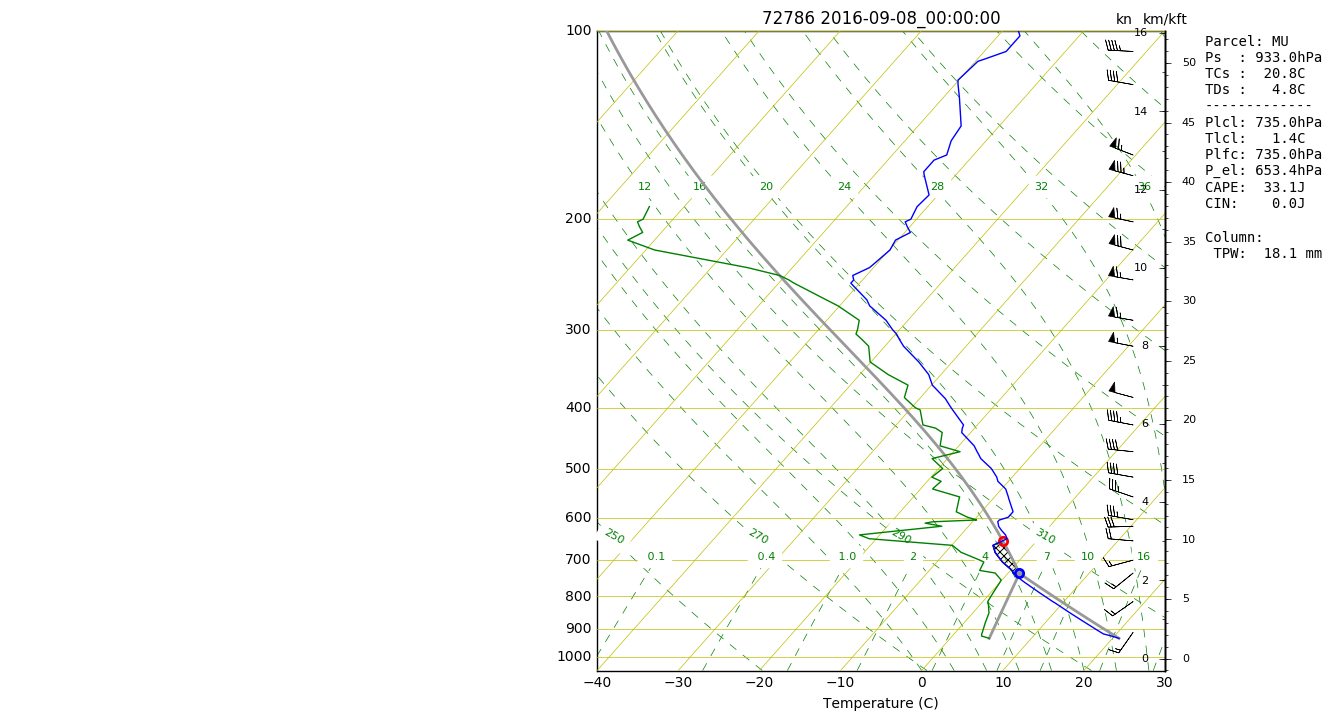

In [73]:
%matplotlib inline

from skewt import SkewT

S=SkewT.Sounding("OTX_09082016.txt")
parcel=S.get_parcel(method='mu')
print S.get_cape(*parcel)
S.plot_skewt()


---- Lifted Parcel Quantities ----
Parcel: SB
Ps  : 971.8hPa
TCs :  22.3C
TDs :   0.3C
-------------
Plcl: 699.3hPa
Tlcl:  -4.2C
Plfc:   nanhPa
P_el:   nanhPa
CAPE:   0.0J
CIN:    0.0J


/home/thomasvdv/anaconda2/lib/python2.7/site-packages/skewt/SkewT.py:769: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=dwpt.min()


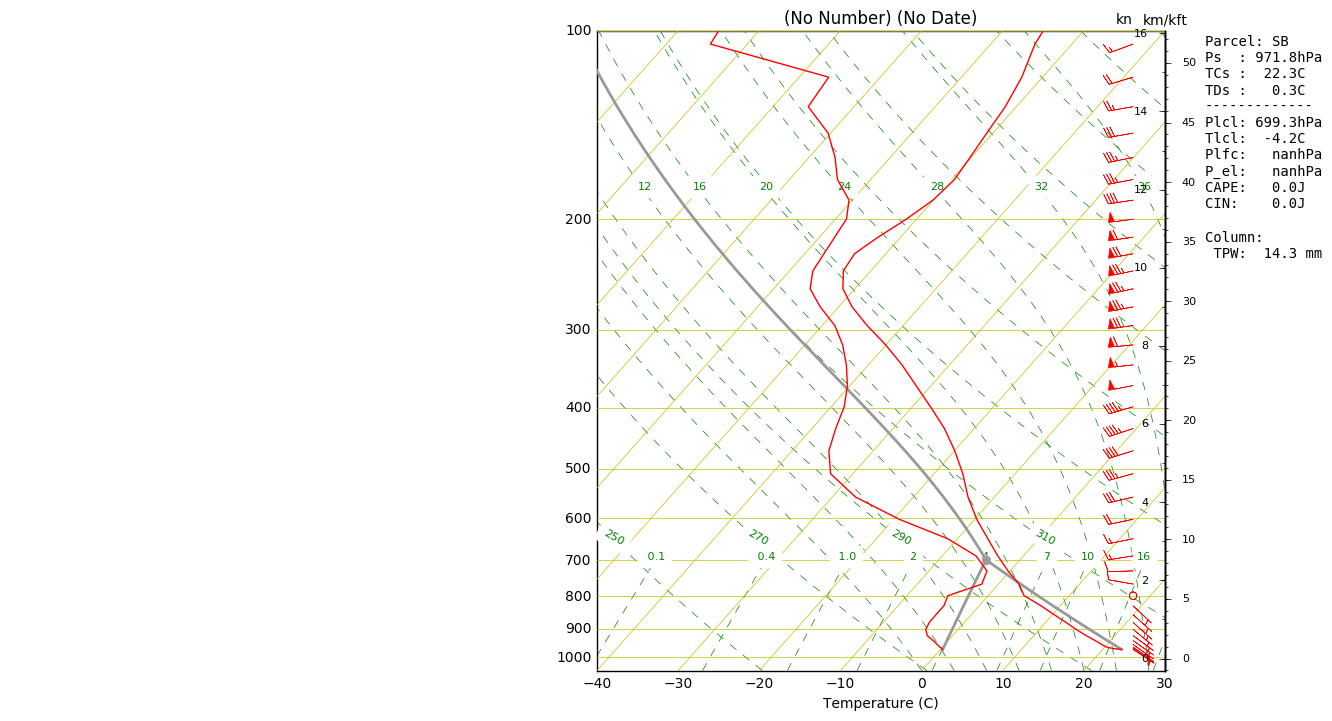

In [52]:
%matplotlib inline

import numpy as np
import pandas as pd
from skewt import SkewT

df_snd = pd.read_csv('RAP_KEPH_130601_21z_F00.csv')

# Retrieve surface temperature
base_tmp = df_snd.loc[0]['TMP']
base_hgt = df_snd.loc[0]['HGT']

# Add the DALR

df_snd['DALR'] = base_tmp - ((df_snd.HGT-base_hgt)/1000)*9.8

# Virtual Temperature
df_snd['VIRTT'] = (df_snd.TMP+273.15)/(1 - 0.379*(6.11*np.power(((7.5*df_snd.DPT)/(237.7+df_snd.DPT)),10))/df_snd.level)-273.15

# Thermal Index
df_snd['TI'] = df_snd.TMP - df_snd.DALR

hght = df_snd[['HGT']].as_matrix().flatten()
pres = df_snd[['level']].as_matrix().flatten()
temp = df_snd[['TMP']].as_matrix().flatten()
dwpt = df_snd[['DPT']].as_matrix().flatten()
sknt = df_snd[['WSPD']].as_matrix().flatten()
drct = df_snd[['WDIR']].as_matrix().flatten()

mydata=dict(zip(('hght','pres','temp','dwpt','sknt', 'drct'),(hght, pres, temp, dwpt, sknt, drct)))
S=SkewT.Sounding(soundingdata=mydata)
S.plot_skewt(color='r')


    level        HGT   TMP_C    RH     DEWP_C        DALR    TMP_K  \
0    1000    154.731  23.678  22.0   0.719473   23.678000  296.828   
1     975    363.722  22.367  22.0  -0.372756   21.629888  295.517   
2     950    588.141  20.669  22.0  -1.788824   19.430582  293.819   
3     925    816.830  18.269  24.0  -2.628273   17.189430  291.419   
4     900   1049.990  15.866  28.0  -2.601917   14.904462  289.016   
5     875   1287.770  13.436  32.0  -2.915273   12.574218  286.586   
6     850   1530.300  10.965  36.0  -3.515536   10.197424  284.115   
7     825   1778.000   8.534  41.0  -3.956785    7.769964  281.684   
8     800   2031.060   6.097  48.0  -4.078919    5.289976  279.247   
9     775   2289.960   3.720  56.0  -4.235432    2.752756  276.870   
10    750   2555.150   1.422  67.0  -4.025593    0.153894  274.572   
11    725   2827.120  -0.498  69.0  -5.479327   -2.511412  272.652   
12    700   3106.700  -2.405  68.0  -7.499339   -5.251296  270.745   
13    675   3394.270

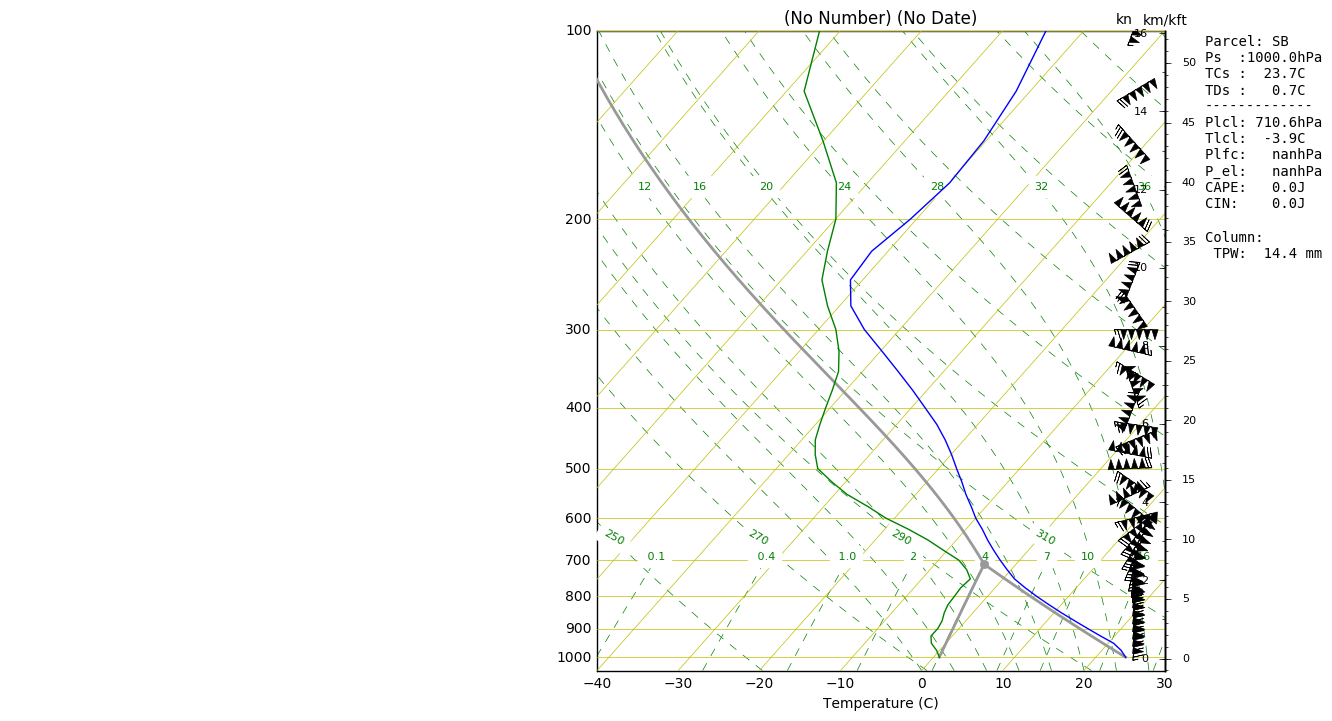

In [74]:
%matplotlib inline

import numpy as np
import pandas as pd
from skewt import SkewT

# Dewpoint calculation adapted from ...
def dew_point(df_snd):
    
    df_snd['DPT_B'] = df_snd.TMP_C.apply(lambda x: 17.368 if x > 0 else 17.966)
    df_snd['DPT_C'] = df_snd.TMP_C.apply(lambda x: 238.88 if x > 0 else 247.15)

    pa = df_snd.RH / 100. * np.exp(df_snd.DPT_B * df_snd.TMP_C / (df_snd.DPT_C + df_snd.TMP_C))

    df_snd['DEWP_C'] = df_snd.DPT_C * np.log(pa) / (df_snd.DPT_B - np.log(pa))

    return df_snd



df = pd.read_csv('68de910c-ff55-4be7-b163-0d46e8a94c97.csv')

# Geopotential Height
df_hgt = df.loc[df['paramId'] == 156][0:37]
df_hgt = df_hgt.rename(columns={'value':'HGT'}).drop('paramId', 1)

# Temperature
df_tmp = df.loc[df['paramId'] == 130][0:37]
df_tmp = df_tmp.rename(columns={'value':'TMP_K'}).drop('paramId', 1)
 
# Relative Humidity
df_rh = df.loc[df['paramId'] == 157][0:37]
df_rh = df_rh.rename(columns={'value':'RH'}).drop('paramId', 1)

# U component of wind
df_uw = df.loc[df['paramId'] == 131][0:37]
df_uw = df_uw.rename(columns={'value':'W_U'}).drop('paramId', 1)

# V component of wind
df_vw = df.loc[df['paramId'] == 132][0:37]
df_vw = df_vw.rename(columns={'value':'W_V'}).drop('paramId', 1)

# Ground Temperature
df_gtmp = df.loc[df['paramId'] == 167]

dfs = [df_hgt, df_tmp, df_rh, df_uw, df_vw]

df_snd = reduce(lambda left,right: pd.merge(left,right,on='level'), dfs)

# Wind Speed
df_snd['W_SPD_MS'] = np.sqrt(np.power(2,df_snd.W_U) + np.power(2, df_snd.W_V))
df_snd['W_SPD_KTS'] = df_snd.W_SPD_MS * 1.94384

# Wind Direction
df_snd['W_DIR'] = 270 - (np.arctan2(df_snd.W_V, df_snd.W_U) * (180/np.pi))

# Temperature in Celcius
df_snd['TMP_C'] = df_snd.TMP_K - 273.15

# Dewpoint Temperature
dew_point(df_snd)

# Retrieve surface temperature
base_tmp = df_snd.loc[0]['TMP_C']
base_hgt = df_snd.loc[0]['HGT']

# Add the DALR

df_snd['DALR'] = base_tmp - ((df_snd.HGT-base_hgt)/1000)*9.8

# Virtual Temperature
df_snd['VIRTT'] = (df_snd.TMP_K)/(1 - 0.379*(6.11*np.power(((7.5*df_snd.DEWP_C)/(237.7+df_snd.DEWP_C)),10))/df_snd.level)-273.15

# Thermal Index
df_snd['TI'] = df_snd.TMP_C - df_snd.DALR

print df_snd[['level', 'HGT', 'TMP_C', 'RH', 'DEWP_C', 'DALR', 'TMP_K', 'VIRTT', 'TI']]


hght = df_snd[['HGT']].as_matrix().flatten()
pres = df_snd[['level']].as_matrix().flatten()
temp = df_snd[['TMP_C']].as_matrix().flatten()
dwpt = df_snd[['DEWP_C']].as_matrix().flatten()
sknt = df_snd[['W_DIR']].as_matrix().flatten()
drct = df_snd[['W_SPD_KTS']].as_matrix().flatten()

mydata=dict(zip(('hght','pres','temp','dwpt','sknt', 'drct'),(hght, pres, temp, dwpt, sknt, drct)))
S=SkewT.Sounding(soundingdata=mydata)
S.plot_skewt()